In [1]:
import torch
import torch.nn as nn
import numpy as np
from utilis_ForsaV2 import *
import utilis_ForsaV2
# !pip install fxpmath\
from fxpmath import Fxp
import time
word_size  = 8
frac_size = 6
utilis_ForsaV2.word_size = word_size
utilis_ForsaV2.frac_size = frac_size
# from tensorboardX import SummaryWriter
# from transforms import *
# from models_cust import *


In [2]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'vgg11', pretrained=True)
model.eval()

Using cache found in C:\Users\huruy/.cache\torch\hub\pytorch_vision_v0.10.0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [2]:
# # Uncomment to visualize it in netron locally
# # # Assuming `model` is your PyTorch model
# model_path = './PretrainedModels/vgg11PretrainedIM1K.pth'

# # # Save the entire model, including its architecture and trained parameters
# # # torch.save(model, model_path)
# torch.jit.script(model).save(model_path)

In [2]:
# def count_parameters(model):
#     return sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(count_parameters(model))

3504872


In [65]:
from torchsummary import summary
summary(model.to('cuda'), (3, 224, 224)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
         MaxPool2d-3         [-1, 64, 112, 112]               0
            Conv2d-4        [-1, 128, 112, 112]          73,856
              ReLU-5        [-1, 128, 112, 112]               0
         MaxPool2d-6          [-1, 128, 56, 56]               0
            Conv2d-7          [-1, 256, 56, 56]         295,168
              ReLU-8          [-1, 256, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         590,080
             ReLU-10          [-1, 256, 56, 56]               0
        MaxPool2d-11          [-1, 256, 28, 28]               0
           Conv2d-12          [-1, 512, 28, 28]       1,180,160
             ReLU-13          [-1, 512, 28, 28]               0
           Conv2d-14          [-1, 512,

# Demonstrating sorting for VGG11
a) Regular convolution 

In [3]:
No_layers=11-1 # to exlude classifier network
sw_wt = np.zeros(No_layers)
sw_bias = np.zeros(No_layers)
sw_wt_sorted = np.zeros(No_layers)
sw_bias_sorted = np.zeros(No_layers)
########## sorting features.0 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[0].weight)
model.features[0].weight.data, _, sw_wt[0], sw_wt_sorted[0]  = compare_sw_sort(model.features[0].weight.data, new_indx1, -3)
model.features[0].bias.data, _, sw_bias[0], sw_bias_sorted[0]  = compare_sw_sort(model.features[0].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[3].weight.data = model.features[3].weight[:, new_indx1, :, :]

# ########## sorting features.3 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[3].weight)
model.features[3].weight.data, _, sw_wt[1], sw_wt_sorted[1]  = compare_sw_sort(model.features[3].weight.data, new_indx1, -3)
model.features[3].bias.data, _, sw_bias[1], sw_bias_sorted[1]  = compare_sw_sort(model.features[3].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[6].weight.data = model.features[6].weight[:, new_indx1, :, :]

# ########## sorting features.6 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[6].weight)
model.features[6].weight.data, _, sw_wt[2], sw_wt_sorted[2]  = compare_sw_sort(model.features[6].weight.data, new_indx1, -3)
model.features[6].bias.data, _, sw_bias[2], sw_bias_sorted[2]  = compare_sw_sort(model.features[6].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[8].weight.data = model.features[8].weight[:, new_indx1, :, :]

# ########## sorting features.8 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[8].weight)
model.features[8].weight.data, _, sw_wt[3], sw_wt_sorted[3]  = compare_sw_sort(model.features[8].weight.data, new_indx1, -3)
model.features[8].bias.data, _, sw_bias[3], sw_bias_sorted[3]  = compare_sw_sort(model.features[8].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[11].weight.data = model.features[11].weight[:, new_indx1, :, :]

# ########## sorting features.11 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[11].weight)
model.features[11].weight.data, _, sw_wt[4], sw_wt_sorted[4]  = compare_sw_sort(model.features[11].weight.data, new_indx1, -3)
model.features[11].bias.data, _, sw_bias[4], sw_bias_sorted[4]  = compare_sw_sort(model.features[11].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[13].weight.data = model.features[13].weight[:, new_indx1, :, :]


Switching before sorting 6897.0
Switching after sorting 5473.0
Percentage of reduction 20.64665796723213 %
Switching before sorting 253.0
Switching after sorting 238.0
Percentage of reduction 5.928853754940712 %
Switching before sorting 271591.0
Switching after sorting 234192.0
Percentage of reduction 13.770338486915987 %
Switching before sorting 505.0
Switching after sorting 505.0
Percentage of reduction 0.0 %
Switching before sorting 1021077.0
Switching after sorting 904084.0
Percentage of reduction 11.45780386787676 %
Switching before sorting 902.0
Switching after sorting 816.0
Percentage of reduction 9.534368070953438 %
Switching before sorting 2014210.0
Switching after sorting 1822261.0
Percentage of reduction 9.529741188853198 %
Switching before sorting 1041.0
Switching after sorting 916.0
Percentage of reduction 12.007684918347742 %
Switching before sorting 3756702.0
Switching after sorting 3402506.0
Percentage of reduction 9.42837627259229 %
Switching before sorting 1994.0
Swit

In [4]:
# ########## sorting features.13 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[13].weight)
model.features[13].weight.data, _, sw_wt[5], sw_wt_sorted[5]  = compare_sw_sort(model.features[13].weight.data, new_indx1, -3)
model.features[13].bias.data, _, sw_bias[5], sw_bias_sorted[5]  = compare_sw_sort(model.features[13].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[16].weight.data = model.features[16].weight[:, new_indx1, :, :]


Switching before sorting 6762321.0
Switching after sorting 6276516.0
Percentage of reduction 7.1839979202406985 %
Switching before sorting 1817.0
Switching after sorting 1712.0
Percentage of reduction 5.778756191524491 %


In [5]:
# ########## sorting features.16 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[16].weight)
model.features[16].weight.data, _, sw_wt[6], sw_wt_sorted[6]  = compare_sw_sort(model.features[16].weight.data, new_indx1, -3)
model.features[16].bias.data, _, sw_bias[6], sw_bias_sorted[6]  = compare_sw_sort(model.features[16].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging features.3 ##########
model.features[18].weight.data = model.features[18].weight[:, new_indx1, :, :]


Switching before sorting 6870480.0
Switching after sorting 6422010.0
Percentage of reduction 6.5274915289761415 %
Switching before sorting 2070.0
Switching after sorting 1733.0
Percentage of reduction 16.280193236714975 %


In [6]:
# ########## sorting features.18 ##########
_, new_indx1 = sortFullMatrix_V2(model.features[18].weight)
model.features[18].weight.data, _, sw_wt[7], sw_wt_sorted[7]  = compare_sw_sort(model.features[18].weight.data, new_indx1, -3)
model.features[18].bias.data, _, sw_bias[7], sw_bias_sorted[7]  = compare_sw_sort(model.features[18].bias.data, new_indx1, -1)
# plot_dist(model.features[0][0].weight)
########## rearranging classifier.0 ##########
# Reshaping first classifier weight to rearrange prior to its sort
fc1_weight = model.classifier[0].weight
fc1_weight = fc1_weight.view(4096, 512, 7, 7)
new_fc1_weight = fc1_weight[:, new_indx1, :, :]
model.classifier[0].weight.data = new_fc1_weight.view(new_fc1_weight.shape[0], -1) 

Switching before sorting 6672685.0
Switching after sorting 6177848.0
Percentage of reduction 7.41586033208521 %
Switching before sorting 1670.0
Switching after sorting 1610.0
Percentage of reduction 3.592814371257485 %


In [9]:
# ########## sorting classifier.0 ##########
_, new_indx1 = sortFullMatrix_V2(model.classifier[0].weight)
model.classifier[0].weight.data, _, sw_wt[8], sw_wt_sorted[8]  = compare_sw_sort(model.classifier[0].weight.data, new_indx1, -1, isconv=False)
model.classifier[0].bias.data, _, sw_bias[8], sw_bias_sorted[8]  = compare_sw_sort(model.classifier[0].bias.data, new_indx1, -1, isconv=False)
########## rearranging classifier.3 ##########
model.classifier[3].weight.data = model.classifier[3].weight[:, new_indx1]


Switching before sorting 7511627.0
Switching after sorting 7044806.0
Percentage of reduction 6.214645642016038 %
Switching before sorting 9357.0
Switching after sorting 8630.0
Percentage of reduction 7.769584268462114 %


In [18]:
print('switching activity of weight before sorting: ', sw_wt)
print('switching activity of weight before sorting: ', sw_wt_sorted)
print('Percentage of switching activity of weight changes: ', (sw_wt[:-1] - sw_wt_sorted[:-1])*100/sw_wt[:-1])
print('switching activity of bias after sorting: ', sw_bias)
print('switching activity of bias after sorting: ', sw_bias_sorted)
print('Percentage of switching activity of biases changes: ', (sw_bias[:-1] - sw_bias_sorted[:-1])*100/sw_bias[:-1])


switching activity of weight before sorting:  [6.897000e+03 2.715910e+05 1.021077e+06 2.014210e+06 3.756702e+06
 6.762321e+06 6.870480e+06 6.672685e+06 7.511627e+06 0.000000e+00]
switching activity of weight before sorting:  [5.473000e+03 2.341920e+05 9.040840e+05 1.822261e+06 3.402506e+06
 6.276516e+06 6.422010e+06 6.177848e+06 7.044806e+06 0.000000e+00]
Percentage of switching activity of weight changes:  [20.64665797 13.77033849 11.45780387  9.52974119  9.42837627  7.18399792
  6.52749153  7.41586033  6.21464564]
switching activity of bias after sorting:  [ 253.  505.  902. 1041. 1994. 1817. 2070. 1670. 9357.    0.]
switching activity of bias after sorting:  [ 238.  505.  816.  916. 1772. 1712. 1733. 1610. 8630.    0.]
Percentage of switching activity of biases changes:  [ 5.92885375  0.          9.53436807 12.00768492 11.1334002   5.77875619
 16.28019324  3.59281437  7.76958427]


This ...

# 
b) Linear

The above ...

In [10]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
filename = 'dog.jpg'
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over ImageNet's 1000 classes

# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)


In [11]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Samoyed 0.6673733592033386
Pomeranian 0.16195271909236908
Eskimo dog 0.01775933988392353
collie 0.017686188220977783
keeshond 0.017065558582544327


In [14]:
import numpy as np
from scipy.spatial.distance import hamming

# Create a sample matrix (replace this with your data)
matrix_original = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate pairwise cosine similarities between rows
def sort_rows(matrix):
    
    similarities = []
    for i in range(len(matrix)):
        similarity_row = []
        for j in range(len(matrix)):
            similarity = 1 - hamming(matrix[i], matrix[j])
            similarity_row.append(similarity)
        similarities.append(similarity_row)

    # Sort rows based on their similarity to the first row (you can choose a different reference row)
    sorted_indices = np.argsort(similarities[0])[::-1]
    sorted_matrix = matrix[sorted_indices]

    return sorted_matrix, sorted_indices
# matrix_sorted = sort_rows(matrix_original)

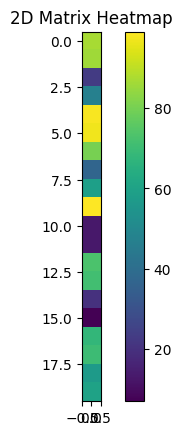

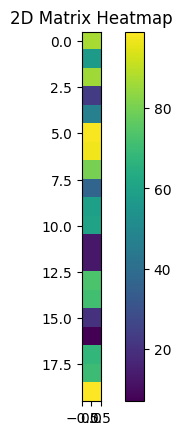

Original Matrix:
[[87]
 [86]
 [23]
 [47]
 [98]
 [97]
 [80]
 [37]
 [59]
 [99]
 [13]
 [13]
 [73]
 [71]
 [20]
 [ 7]
 [68]
 [70]
 [57]
 [60]]

Sorted Matrix:
[[87]
 [57]
 [86]
 [23]
 [47]
 [98]
 [97]
 [80]
 [37]
 [59]
 [60]
 [13]
 [13]
 [73]
 [71]
 [20]
 [ 7]
 [68]
 [70]
 [99]]


In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a sample 2D matrix (replace this with your data)
matrix = np.random.randint(1, 101, size=(20, 1))
# matrix = (matrix * (2**frac_size)).astype(int)
# Create a heatmap
plt.imshow(matrix, cmap='viridis')  # 'viridis' is one of many available colormaps
plt.colorbar()  # Add a color scale to the side
plt.title('2D Matrix Heatmap')
plt.show()
matrix_sorted, _  = sort_rows(matrix)
# Create a heatmap
plt.imshow(matrix_sorted, cmap='viridis')  # 'viridis' is one of many available colormaps
plt.colorbar()  # Add a color scale to the side
plt.title('2D Matrix Heatmap')
plt.show()
print("Original Matrix:")
print(matrix)

print("\nSorted Matrix:")
print(matrix_sorted)
